# Question 2 Extra: AI Marketing System Overview

## Project Description
The AI Marketing System is a Python-based tool designed to create personalized marketing messages for customers. Leveraging advanced natural language processing (NLP) models and sentiment analysis, the system generates customized marketing content tailored to individual customer profiles. This tool aims to enhance marketing strategies by automating message generation, evaluating their effectiveness, and updating marketing databases to reflect customer preferences.

## Key Features
- **Personalized Message Generation**: Uses GPT-2 to generate marketing messages tailored to customer demographics such as age, gender, education level, and income category.
- **Language Style Flexibility**: Generates messages in different tones and styles, including Formal, Friendly, Humorous, Urgency, Inspirational, Technical, Emotional, Direct, Luxury, and Educational.
- **Sentiment Analysis**: Evaluates generated messages using the VADER SentimentIntensityAnalyzer to ensure positive and engaging content.
- **Readability Assessment**: Measures the readability of messages using `textstat` to ensure they are accessible and easy to understand.
- **Best Style Selection**: Compares different styles of messages for each customer and selects the one with the highest sentiment score and readability.
- **Customer Preferences Tracking**: Updates a campaign database with the best-performing messages and the preferred language style for each customer.
- **Visualization**: Includes the ability to generate charts that display customer preferences for different language styles.

## How It Works
1. **Data Input**: The system takes demographic data and a campaign database as input.
2. **Message Creation**: It generates multiple marketing messages for each customer, each in a different style.
3. **Evaluation**: Each message is analyzed for sentiment and readability, and the best message is selected based on these criteria.
4. **Database Update**: The system updates the campaign database with the best-performing message and the customer's preferred style.

## Loophole
1. **distraction in simulation** Since it takes to long to run the simulation, we simply generate a simulated pattern that will show how banks can have an analysis of customer's perference in marketing message

This AI Marketing System aims to automate and optimize marketing communication, improving customer engagement and streamlining marketing operations.
#### **Below is just a simulation for how our generated content can be used for evaluate the preferred style of customer based on conversion rate of campaign**
#### **The system class in the AIMarketing is just a prototype**
#### **Below removes the redundancy and complexity of language model to allow quick simulation, and how our system would look like from the back end**

Campaign database updated with marketing messages and customer preferences.


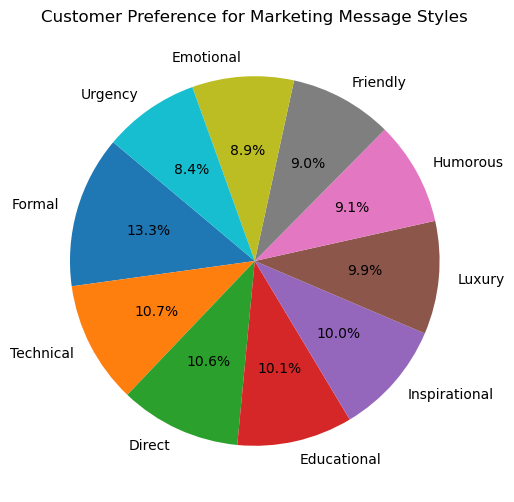

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

class PersonalizedMarketingSystem:
    def __init__(self, demographic_data, campaign_database):
        self.demographic_data = demographic_data
        self.campaign_database = campaign_database
        self.language_styles = ['Formal', 'Friendly', 'Humorous', 'Urgency', 'Inspirational', 
                                'Technical', 'Emotional', 'Direct', 'Luxury', 'Educational']

    def create_prompt(self, row, style):
        prompt = f"Create a {style.lower()} marketing message for a {row['Customer_Age']} year old {row['Gender']}."
        if pd.notnull(row['Education_Level']):
            prompt += f" This individual has an education level of {row['Education_Level']}."
        if pd.notnull(row['Marital_Status']):
            prompt += f" They are {row['Marital_Status']}."
        if pd.notnull(row['Income_Category']):
            prompt += f" Their income category is {row['Income_Category']}."
        if pd.notnull(row['Loyalty']):
            prompt += f" This customer has a loyalty status of {row['Loyalty']}."
        return prompt

    def generate_message(self, prompt):
        # Simulate message generation
        return f"Simulated message for: {prompt[:30]}..."

    def evaluate_message(self, message):
        # Simulate evaluation with random scores
        sentiment_score = np.random.uniform(0.5, 1.0)
        readability = np.random.uniform(50, 100)
        return {
            'SentimentScore': sentiment_score,
            'ReadabilityScore': readability,
            'NumSentences': np.random.randint(1, 5)
        }

    def find_best_message(self, row):
        best_message = None
        best_score = -1
        best_style = None
        
        for style in self.language_styles:
            prompt = self.create_prompt(row, style)
            message = self.generate_message(prompt)
            evaluation = self.evaluate_message(message)

            if evaluation['ReadabilityScore'] > 50 and evaluation['SentimentScore'] > 0.5:
                if evaluation['SentimentScore'] > best_score:
                    best_message = message
                    best_score = evaluation['SentimentScore']
                    best_style = style
        
        return best_message, best_style

    def process_customers(self):
        self.demographic_data[['BestMessage', 'PreferredStyle']] = self.demographic_data.apply(
            lambda row: pd.Series(self.find_best_message(row)), axis=1
        )
        return self.demographic_data

    def update_campaign_database(self):
        for _, row in self.demographic_data.iterrows():
            clientnum = row['CLIENTNUM']
            best_message = row['BestMessage']
            preferred_style = row['PreferredStyle']
            
            if pd.notnull(best_message):
                self.campaign_database.loc[self.campaign_database['CLIENTNUM'] == clientnum, 'Message'] = best_message
                self.campaign_database.loc[self.campaign_database['CLIENTNUM'] == clientnum, 'PreferredStyle'] = preferred_style

        print("Campaign database updated with marketing messages and customer preferences.")

    def plot_preference_distribution(self):
        style_counts = self.demographic_data['PreferredStyle'].value_counts()
        plt.figure(figsize=(10, 6))
        plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title('Customer Preference for Marketing Message Styles')
        plt.show()

# Simulate generating 1000 customer demographic data
np.random.seed()
n_customers = 1000

demographic_data = pd.DataFrame({
    'CLIENTNUM': np.arange(1, n_customers + 1),
    'Customer_Age': np.random.randint(18, 70, n_customers),
    'Gender': np.random.choice(['Male', 'Female'], n_customers),
    'Education_Level': np.random.choice(['High School', 'Bachelor', 'Master', 'Doctorate'], n_customers),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], n_customers),
    'Income_Category': np.random.choice(['<40K', '40K-60K', '60K-80K', '80K-120K', '120K+'], n_customers),
    'Loyalty': np.random.choice(['Low', 'Medium', 'High'], n_customers),
    'Card_Category': np.random.choice(['Blue', 'Silver', 'Gold', 'Platinum'], n_customers),
    'Digital_Capability': np.random.choice([0, 1], n_customers),
    'Financial_Status': np.random.choice(['High', 'Low', 'Moderate'], n_customers)
})

# Create a simulated campaign database with the required structure
campaign_database = pd.DataFrame({
    'CLIENTNUM': np.arange(1, n_customers + 1),
    'Campaign_ID': np.random.randint(1000, 5000, n_customers),
    'Campaign_Type': np.random.choice(['Retention', 'Conversion', 'Consideration'], n_customers),
    'Start_Date': pd.date_range(start='2024-01-01', periods=n_customers, freq='D'),
    'End_Date': pd.date_range(start='2024-04-01', periods=n_customers, freq='D'),
    'Response_Status': np.random.choice(['No Response', 'Positive', 'Negative'], n_customers),
    'Message': [None] * n_customers,  # Placeholder for generated messages
    'PreferredStyle': [None] * n_customers  # Placeholder for preferred style
})

# Instantiate the system and run the simulation
marketing_system = PersonalizedMarketingSystem(demographic_data=demographic_data, campaign_database=campaign_database)
processed_data = marketing_system.process_customers()
marketing_system.update_campaign_database()

# Plot the customer preference distribution
marketing_system.plot_preference_distribution()
